In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sqlalchemy import create_engine

In [50]:
exchange_id = 1
symbol_id = 1

In [58]:
start_time = '2024-08-29 08:00:00'
end_time = '2024-08-30 23:59:59'
start_time = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
end_time = datetime.strptime(end_time, '%Y-%m-%d %H:%M:%S')

In [59]:
dbname='market_data'
user='postgres'
password='qwerty123'
host='localhost'
port='5432'

In [60]:
conn_url = f'postgresql://{user}:{password}@{host}:{port}/{dbname}'

In [61]:
engine  = create_engine(conn_url)

In [62]:
query = f"SELECT timestamp, last_price FROM public.tickers WHERE exchange_id = %s AND symbol_id = %s ORDER BY timestamp ASC"

In [63]:
df = pd.read_sql_query(query, engine , params=(exchange_id, symbol_id))

In [64]:
df.head()

,timestamp,last_price
0,2024-08-29 13:50:02.927000+00:00,0.04241
1,2024-08-29 13:50:02.929000+00:00,0.04241
2,2024-08-29 13:50:06.688000+00:00,0.04241
3,2024-08-29 13:50:08.021000+00:00,0.04240
4,2024-08-29 13:50:08.847000+00:00,0.04241


In [99]:
query = f"SELECT timestamp, last_price, side FROM public.tickers WHERE exchange_id = %s AND symbol_id = %s AND timestamp BETWEEN %s AND %s ORDER BY timestamp ASC"

In [100]:
df = pd.read_sql_query(query, engine , params=(exchange_id, symbol_id, start_time, end_time))

In [101]:
df

,timestamp,last_price,side
0,2024-08-29 13:50:02.927000+00:00,0.04241,False
1,2024-08-29 13:50:02.929000+00:00,0.04241,False
2,2024-08-29 13:50:06.688000+00:00,0.04241,False
3,2024-08-29 13:50:08.021000+00:00,0.04240,True
4,2024-08-29 13:50:08.847000+00:00,0.04241,False
5,2024-08-29 13:50:08.847000+00:00,0.04241,False
6,2024-08-29 13:50:08.847000+00:00,0.04241,False
7,2024-08-29 13:50:08.847000+00:00,0.04241,False
8,2024-08-29 13:50:08.847000+00:00,0.04241,False
9,2024-08-29 13:50:08.847000+00:00,0.04241,False


In [110]:
df['sell_price'] = df['last_price'].where(df['side'] == True)
df['buy_price'] = df['last_price'].where(df['side'] == False)

In [111]:
df

,timestamp,last_price,side,sell_price,buy_price
0,2024-08-29 13:50:02.927000+00:00,0.04241,False,NaN,0.04241
1,2024-08-29 13:50:02.929000+00:00,0.04241,False,NaN,0.04241
2,2024-08-29 13:50:06.688000+00:00,0.04241,False,NaN,0.04241
3,2024-08-29 13:50:08.021000+00:00,0.04240,True,0.0424,NaN
4,2024-08-29 13:50:08.847000+00:00,0.04241,False,NaN,0.04241
5,2024-08-29 13:50:08.847000+00:00,0.04241,False,NaN,0.04241
6,2024-08-29 13:50:08.847000+00:00,0.04241,False,NaN,0.04241
7,2024-08-29 13:50:08.847000+00:00,0.04241,False,NaN,0.04241
8,2024-08-29 13:50:08.847000+00:00,0.04241,False,NaN,0.04241
9,2024-08-29 13:50:08.847000+00:00,0.04241,False,NaN,0.04241


In [112]:
exchange_query = f"SELECT name FROM public.exchanges WHERE id = %s" 
exchange_name = pd.read_sql_query(exchange_query, engine , params=(exchange_id,)).iloc[0, 0]

In [113]:
symbol_query = f"SELECT name FROM public.symbols WHERE id = %s AND exchange_id = %s"
symbol_name = pd.read_sql_query(symbol_query, engine , params=(symbol_id, exchange_id,)).iloc[0, 0]

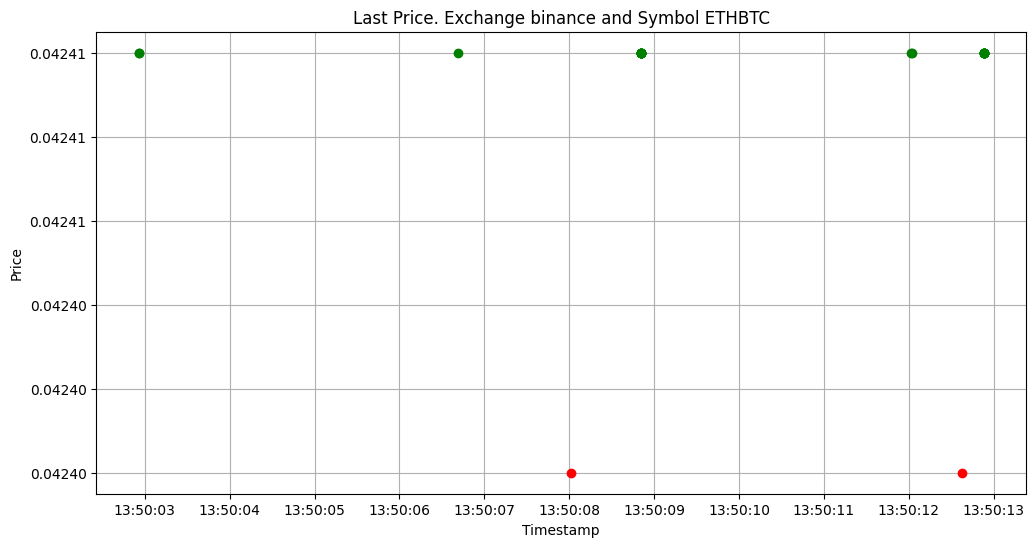

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['sell_price'], marker='o', linestyle='None', color='r')
plt.plot(df['timestamp'], df['buy_price'], marker='o', linestyle='None', color='g')
plt.title(f'Last Price. Exchange {exchange_name} and Symbol {symbol_name}')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.5f}'))
plt.grid(True)
plt.show()